<a href="https://colab.research.google.com/github/smit-collab/Intern-tasks/blob/master/Task_3_To_Explore_Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# reading the dataset
data = pd.read_csv('Iris.csv')

In [3]:
# printing first few rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df1 = data.iloc[:,[1,2,3,4]].values 
df1 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

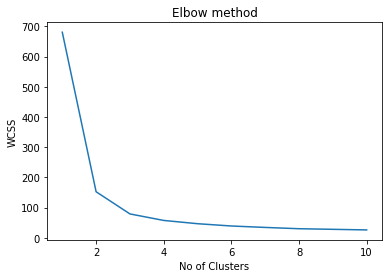

In [9]:
# implementing elbow method on the dataset to find optimum value for k clusters
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters = i , init = 'k-means++' , max_iter=300 , n_init=10,random_state=0)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

We can clearly see that optimum cluster is 3 as that's when the elbow starts to occur.

In [10]:
# applying the k means to the dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(df1)

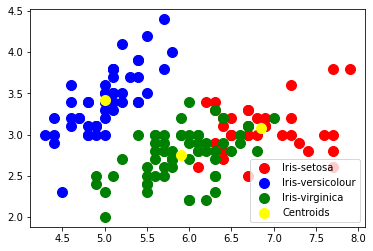

In [17]:
plt.scatter(df1[y_kmeans ==0,0],df1[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(df1[y_kmeans ==1,0],df1[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(df1[y_kmeans ==2,0],df1[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c ='yellow', label ='Centroids')

plt.legend()

References:
1. Elbow Method for optimal value of k in KMeans 2019, https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
2. Simple K-means clustering on the Iris dataset, https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset